In [5]:
G = graphs.KneserGraph(5,2)

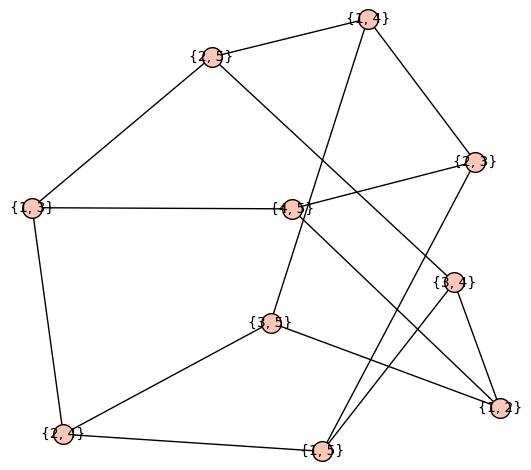

In [6]:
G.plot()

In [9]:
H = graphs.PathGraph(6)

In [11]:
H.is_subgraph(G, induced = False, up_to_isomorphism = True)

True